In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# to find the path 
import os
for dirname, _, filenames in os.walk('/Users/fahad/GP-ML/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/fahad/GP-ML/Data\loan-test.csv
/Users/fahad/GP-ML/Data\loan-train.csv
/Users/fahad/GP-ML/Data\loan_data.csv


In [3]:
loan_train = pd.read_csv('/Users/fahad/GP-ML/Data/loan-train.csv')
loan_test = pd.read_csv('/Users/fahad/GP-ML/Data/loan-test.csv')

# to read the data 

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
print("Rows: ", len(loan_train))

Rows:  614


In [7]:
print("Columns: ", len(loan_train.columns))

Columns:  13


In [8]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


In [9]:
loan_train_columns = loan_train.columns # This variable will have all of the columns of our data set
loan_train_columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
loan_train.describe() # describe function will give us the mean ,count ,....etc 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
loan_train.info() # info function will be give the type of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [13]:
explore_object_type(loan_train, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [14]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [15]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import missingno as msno

In [17]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

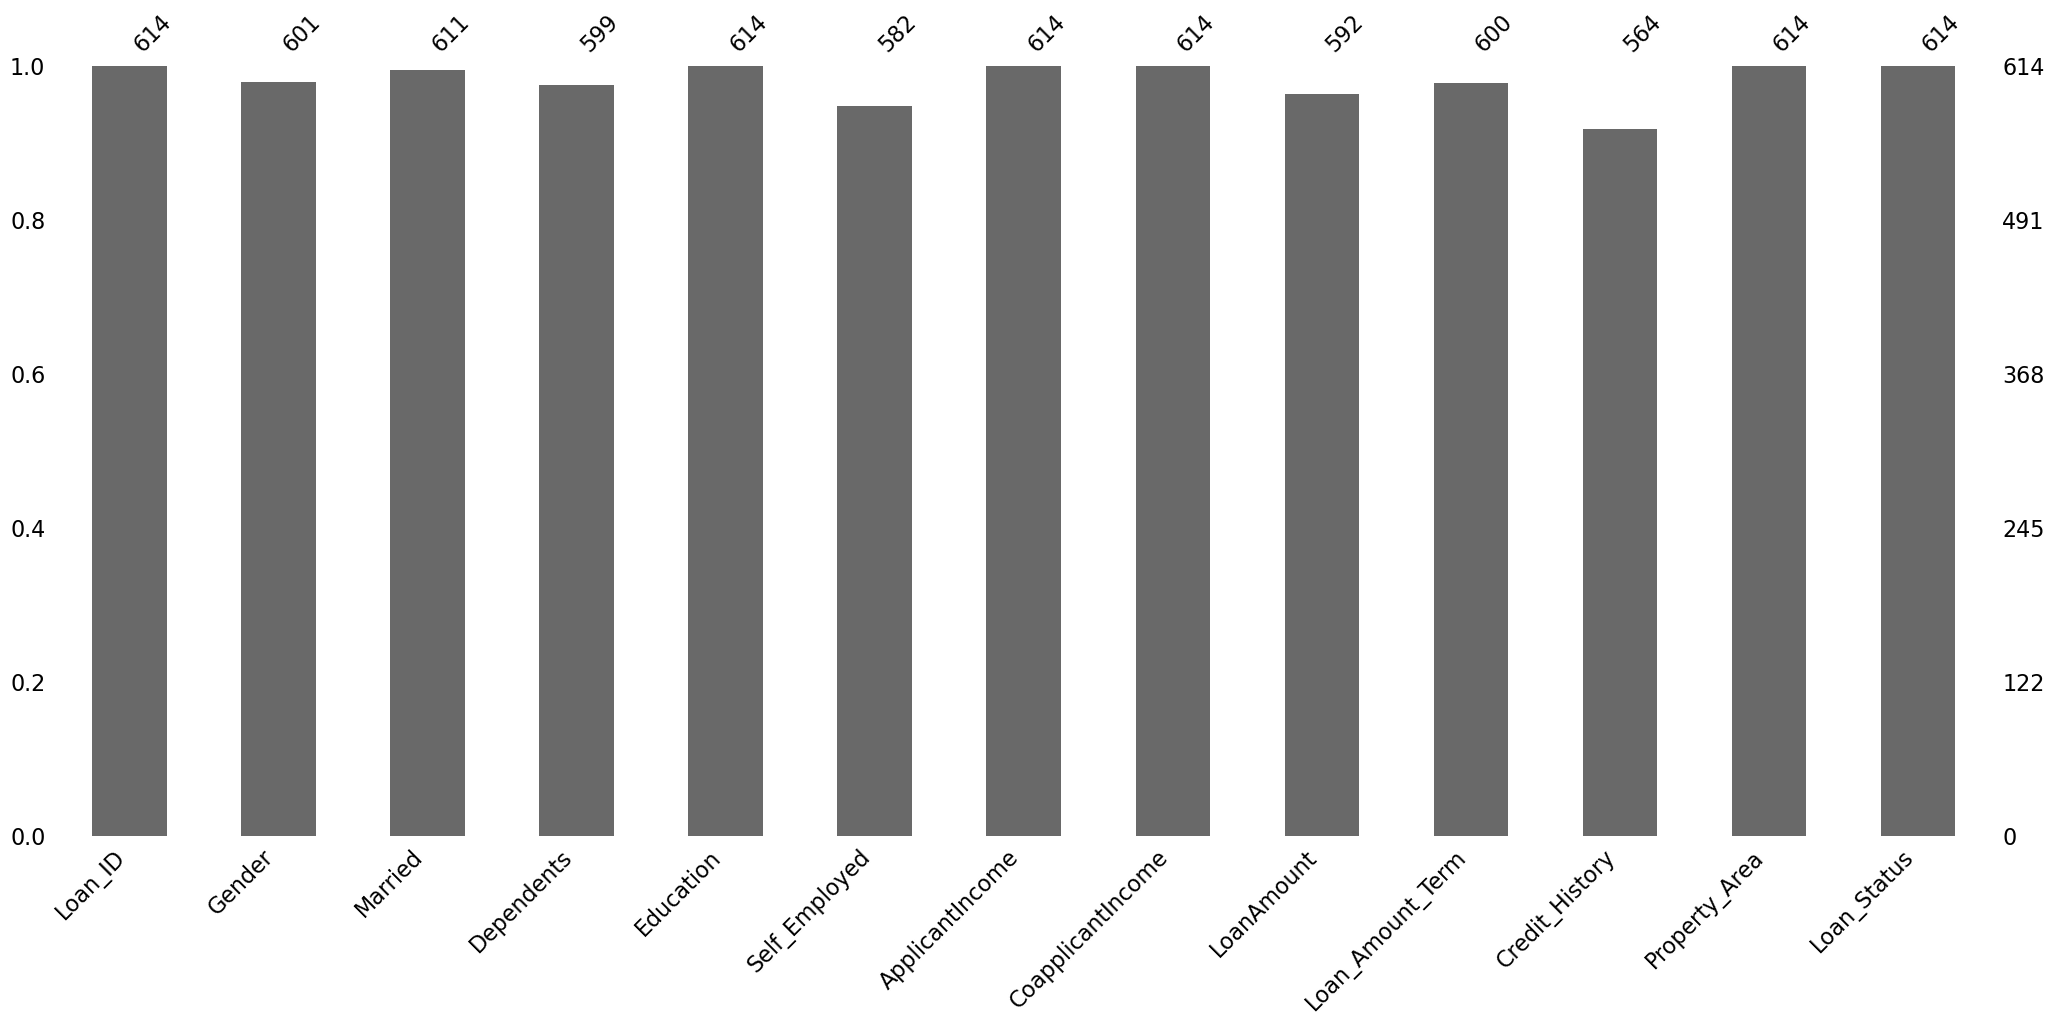

In [18]:
msno.bar(loan_train)

<AxesSubplot:>

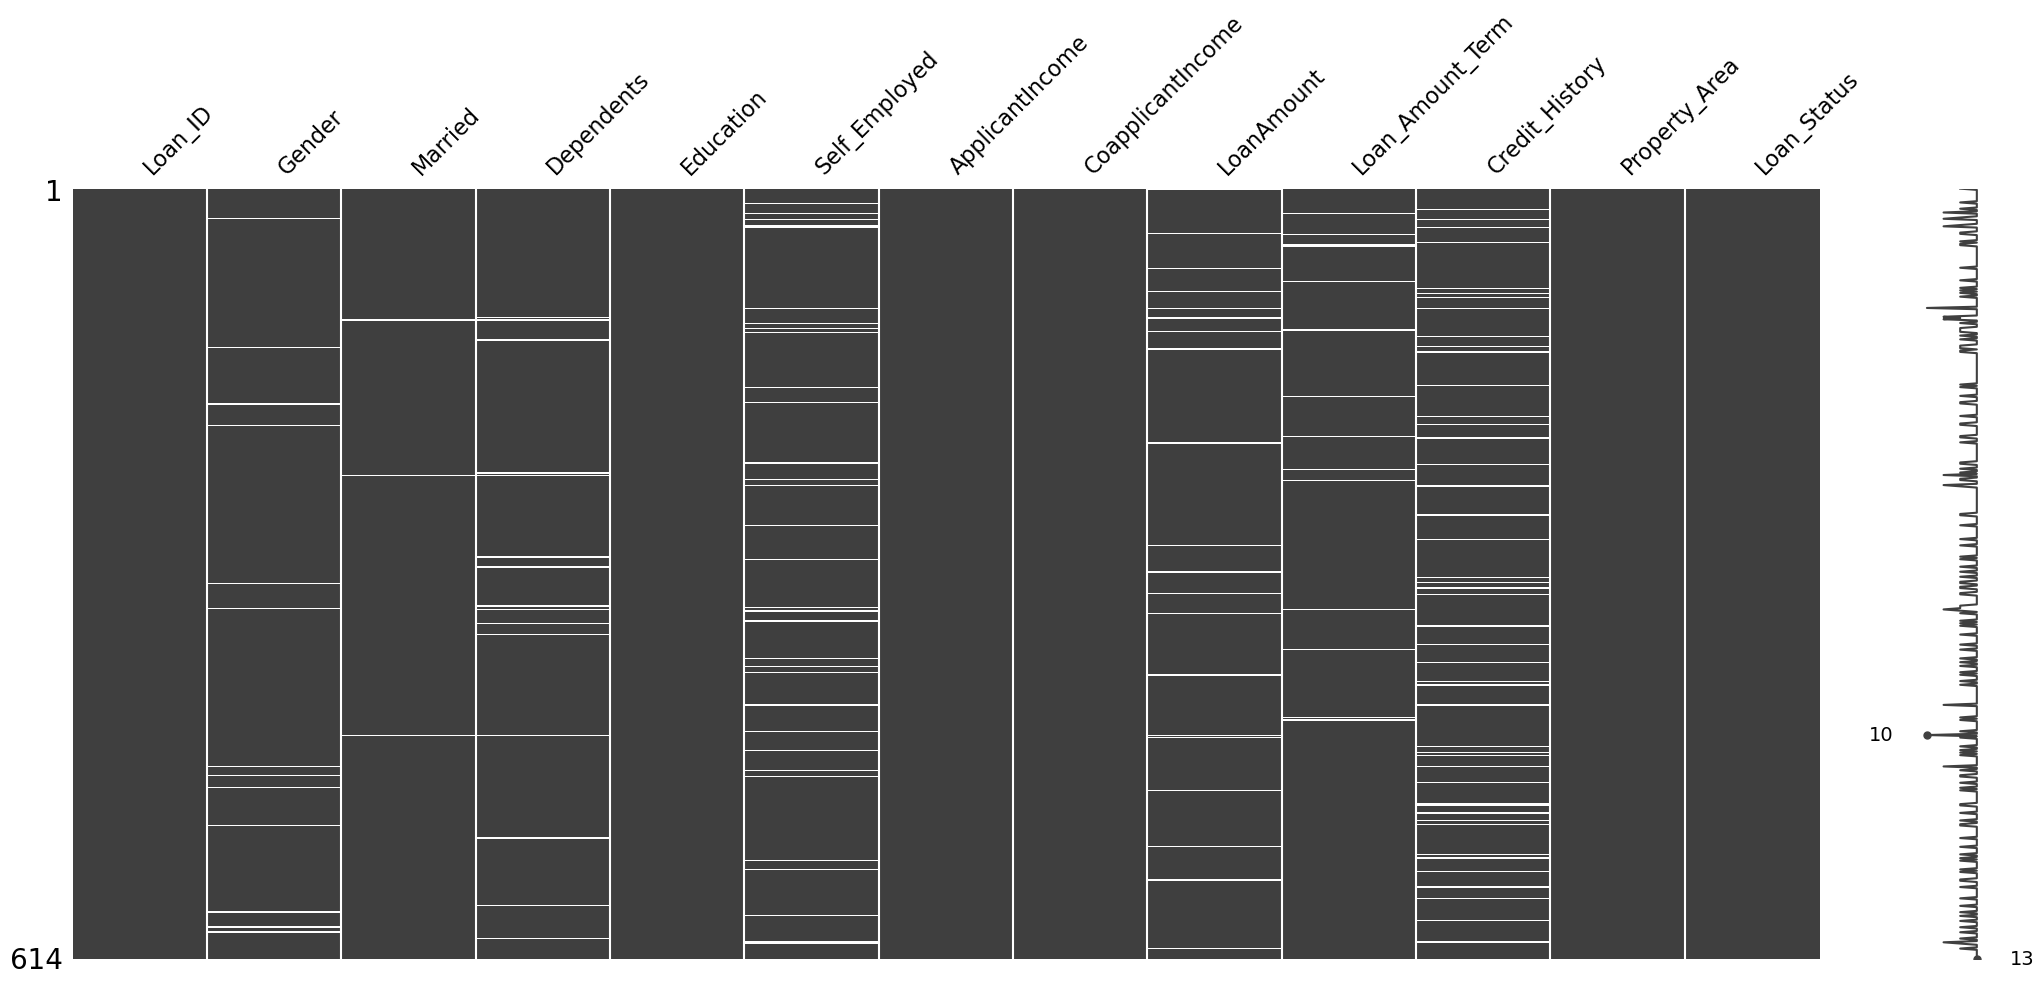

In [19]:
msno.matrix(loan_train )

In [20]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

# fill the missing values with the mean values

In [21]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [22]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

In [25]:
loan_train # data after we've done the replace some values and fill in the missing ones

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


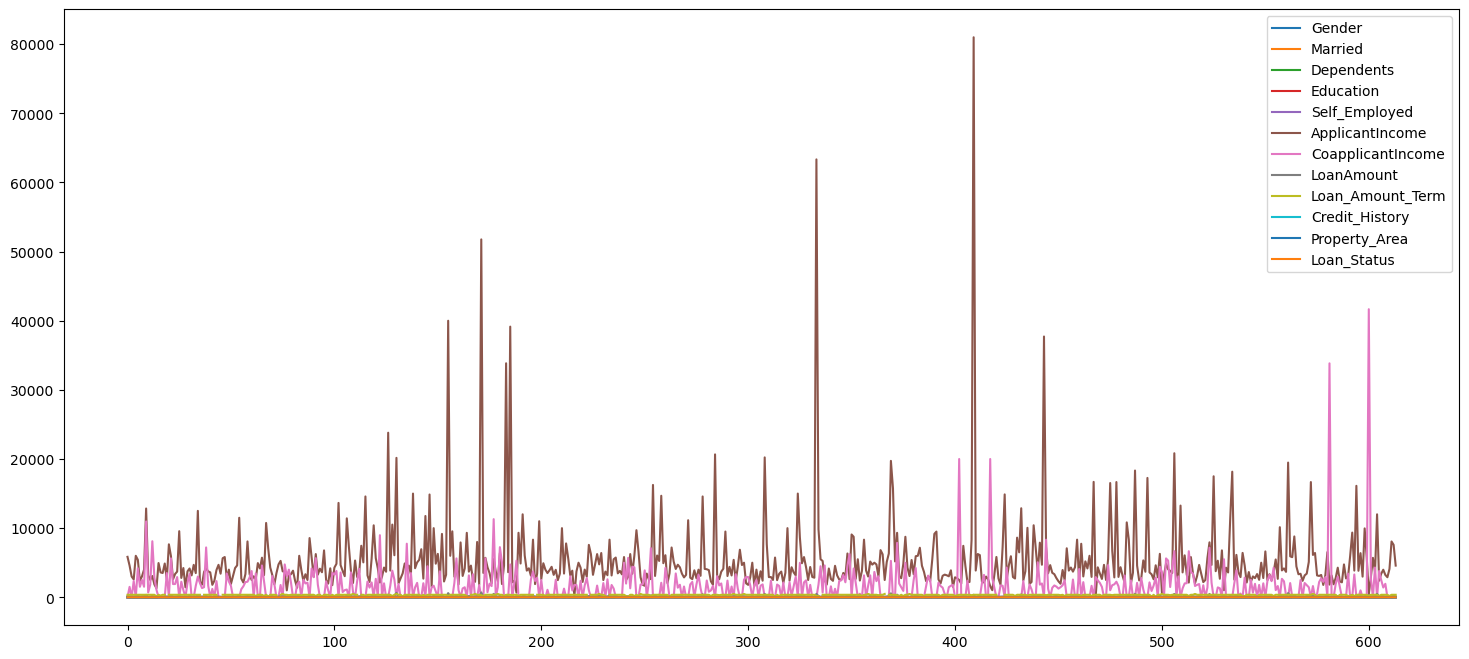

In [26]:
loan_train.plot(figsize=(18, 8))

plt.show()

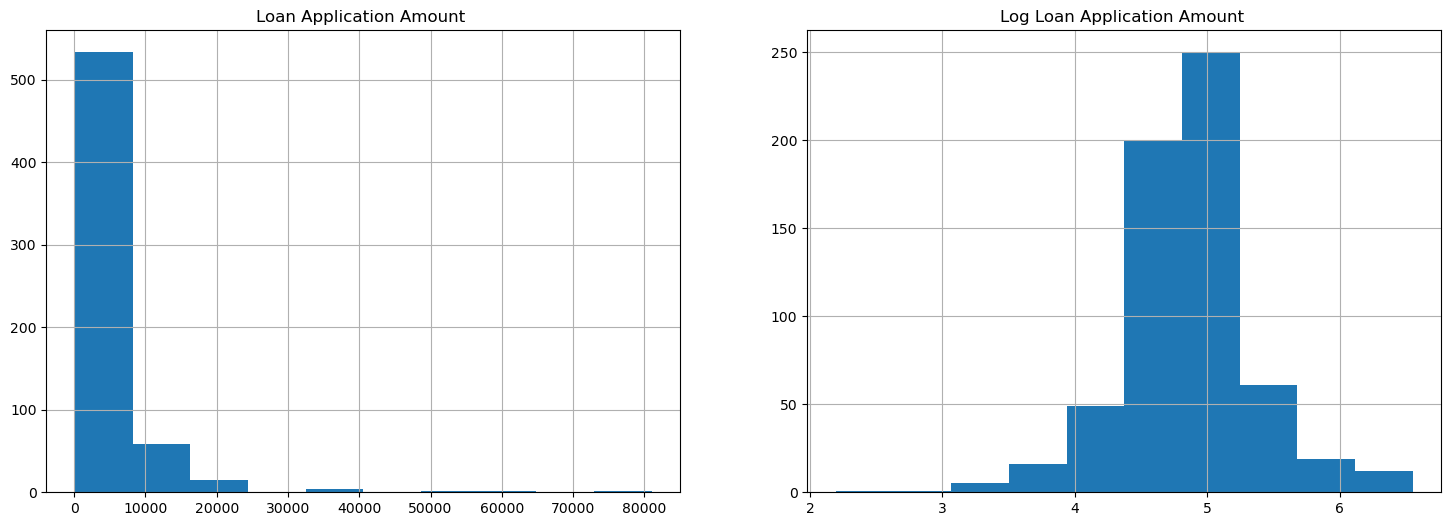

In [27]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

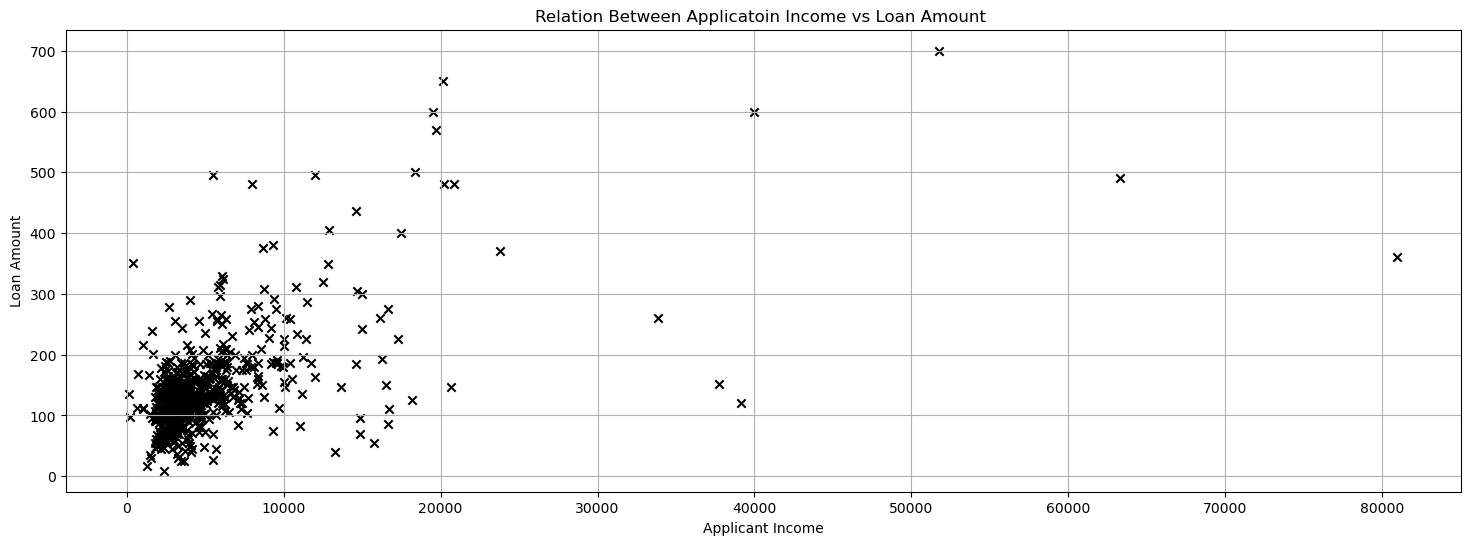

In [28]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

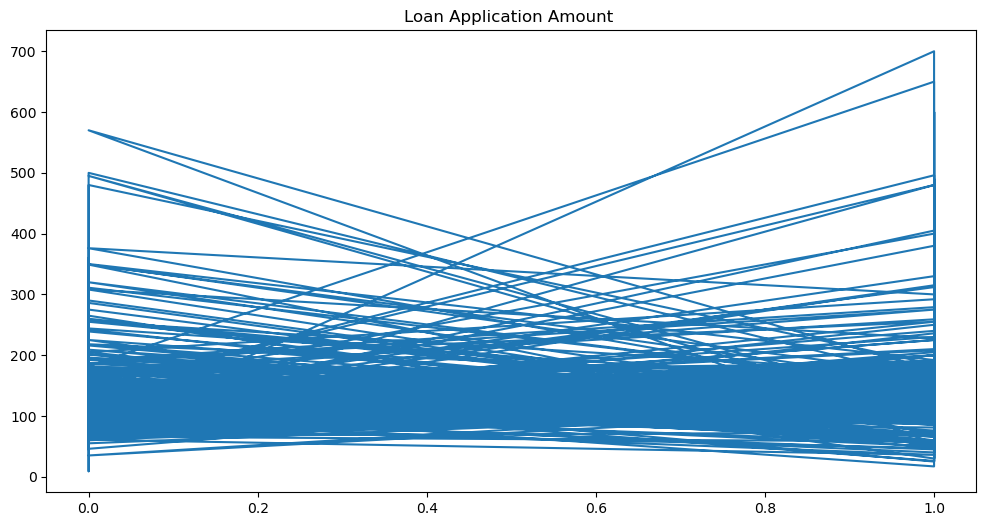

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

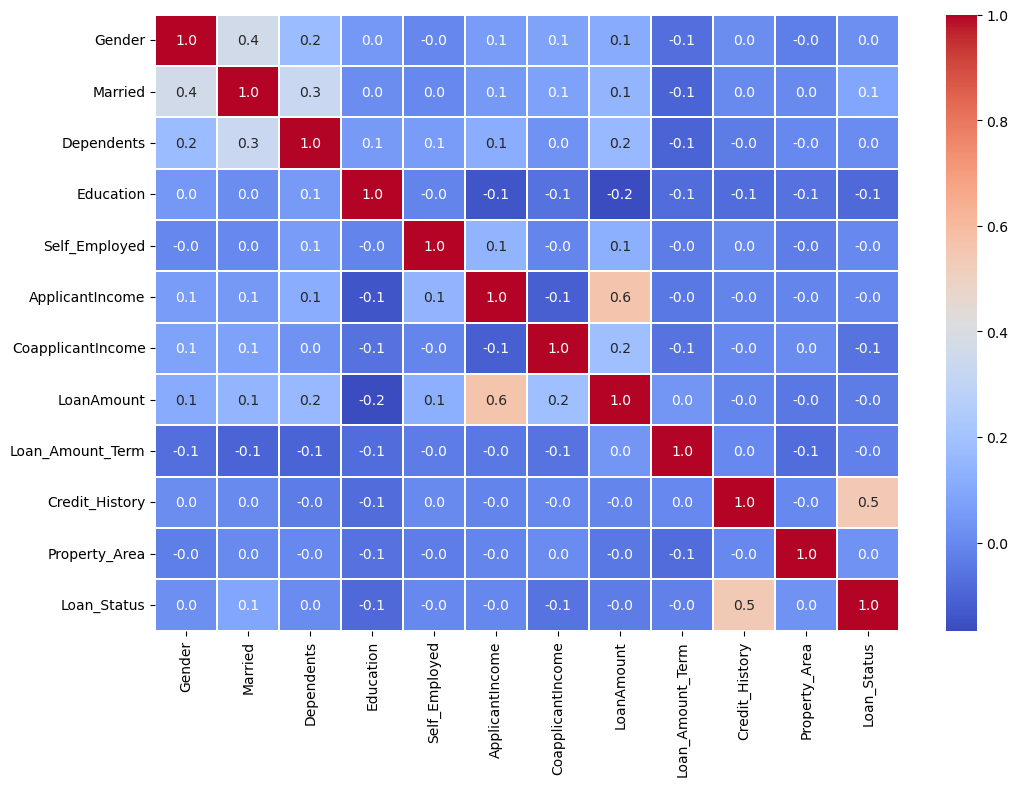

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [32]:
logistic_model = LogisticRegression()

In [33]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [34]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [35]:
predicted = logistic_model.predict(x_test)

In [36]:
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [37]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [38]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [39]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
import pickle as pkl

In [41]:
filename = 'deploy_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [42]:
loan_test[train_features]

,Credit_History,Education,Gender
0,1.000000,0,1.0
1,1.000000,0,1.0
2,1.000000,0,1.0
3,0.825444,0,1.0
4,1.000000,1,1.0
...,...,...,...
362,1.000000,1,1.0
363,1.000000,0,1.0
364,0.825444,0,1.0
365,1.000000,0,1.0


In [43]:
type(loan_test[train_features].values)

numpy.ndarray

In [44]:
logistic_model.predict([[200,1,1]])

array([1], dtype=int64)

In [45]:
type(loan_test['Education'][0])

numpy.int32

In [46]:
type(loan_test['Gender'][0])

numpy.float64